This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will:

- Learn how to generate random variables (discrete or continuous) following different distributions.
- Learn how to represent random variables and distributions
- Calculate main statistics of the generated random variables
- Solve specific problems associated with different distributions

For doing this, we will used the library [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) which allows us to generate random variables following diferent distributions.

# 0. Load libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import binom, poisson, norm

# 1. Binomial distribution

- To generate $N$ Binomial(n,p) r.v.'s we write `binom_rvs = binom.rvs(n,p,size = N)` 
- To generate a Binomial(n,p) pmf we write `binom_pmf = binom(n,p).pmf(x)`

All methods associated with the Binomial distribution can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

Run the following examples, and try to understand the code and the results. Then, solve the proposed exercises.

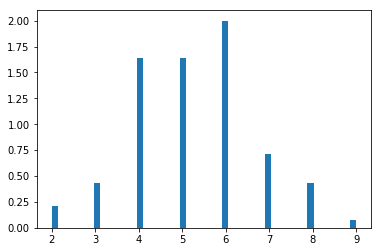

In [19]:
# Example 1: plot the histogram of 100 Binomial(10,0.5) r.v.s
# Change the values of size and bins parameters and see what happens

n = 10
p = 0.5
binom_rvs = binom.rvs(n,p,size = 100)

plt.hist(binom_rvs, density=True, bins=50)
plt.show()

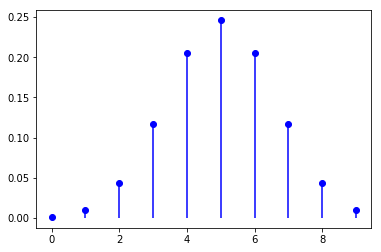

In [3]:
# Example 2: plot the pmf of a Binomial(10,0.5) 
x = range(0,10)
plt.plot(x,binom(10,0.5).pmf(x),'bo')
plt.vlines(x,0,binom(10,0.5).pmf(x),'b')
plt.show()

In [4]:
# Example 3: calculate the mean, std and median values of a Binomial(10,0.5)
print('mean:',binom(10,0.5).mean())
print('std:',binom(10,0.5).std())
print('median:',binom(10,0.5).median())

mean: 5.0
std: 1.5811388300841898
median: 5.0


## Exercise 1

<div class="alert alert-block alert-info">
The prevalence of bronchitis within the polulation is 5%. <br>
- What is the probability that there are 75 bronchitis patients among 1500 subjects? <br>
- What is the probability that there are more than 75 bronchitis patients among 1500 subjects?
</div>



In [5]:
# your code here
p1 = binom(1500,0.05).pmf(75)
print('The probability is ', p1)

p2 = 1 - binom(1500,0.05).cdf(75-1)
print('The probability is ', p2)

The probability is  0.0472099798479879
The probability is  0.516541558588753


In [9]:
p = 0
for n in range(75,1500):
    p += binom(1500,0.05).pmf(n)

print(p)

1499 0.5165415585883422


## Exercise 2 

<div class="alert alert-block alert-info">
Suppose a friend has 8 children, 7 of which are girls and none are twins. If each gender has an independent 50% probability for each birth, what’s the probability of getting 7 or more girls out of 8 births?
</div>

In [21]:
# your code here

# Option 1:
p3 = 1 - binom(8,0.5).cdf(7-1)
print('The probability is ', p3)

# Option 2:
p3 = binom(8,0.5).pmf(7) + binom(8,0.5).pmf(8)
print('The probability is ', p3)

The probability is  0.03515625
The probability is  0.035156250000000014


# 2. Poisson distribution

The [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) distribution is defined by scipy as 

$$f(k) = \exp{(-\mu)}\frac{\mu^k}{k!},\,\textrm{ for } k \geq 0$$

which takes $\mu$ as a parameter

## Exercise 3

<div class="alert alert-block alert-info">
Suppose the number of deaths from typhoid fever over a 1-year period is Poisson distributed with a mean of $4.6$ per year. What is the probability distribution of the number of deaths over a 6-month period? A 3-month period? Represent the associated pmf. In which of these two cases  is it more likely that no one died? Justify your answer 
</div>

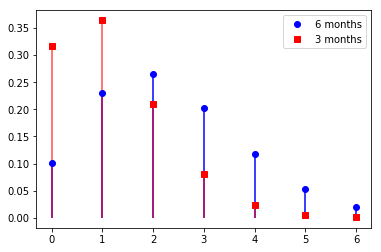

In [22]:
# your code here
# ...

x = range(0,7)

# 6 months
mu  = 4.6*0.5
pmf = poisson(mu).pmf(x)

plt.plot(x,pmf,'bo', label ='6 months')
plt.vlines(x,0,pmf,'b')

# 3 months
mu  = 4.6*0.25
pmf = poisson(mu).pmf(x)

plt.plot(x,pmf,'rs',label='3 months')
plt.vlines(x,0,pmf,'r', alpha =0.7)

plt.legend()

plt.show()

## Exercise 4: poisson approximation to the binomial

<div class="alert alert-block alert-info">
We flip a coin with success probability 0.01 five hundred times. What’s the probability of 2 or fewer successes? Answer the question using a poisson and a binomial distribution 
</div>

In [23]:
# your code here
# ...

# binomial
p = 0.01
n = 500
print('Binomial prob.:',binom(n,p).cdf(2))

# poisson
mu = n*p
print('Poisson  prob.:',poisson(mu).cdf(2))


Binomial prob.: 0.12338577435354905
Poisson  prob.: 0.12465201948308108


# 3. Normal distribution

In scipy, the [normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) is defined in the standarized form

$$f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

## Exercise 5

<div class="alert alert-block alert-info">
Write a python funtion for representing a normal distrution of mean $\mu$ and variance $\sigma^2$
</div>

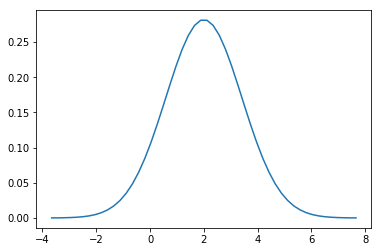

In [24]:
def plot_normal_pdf(mu,sigma2):
    # your code here
    # ...
    
    sigma = np.sqrt(sigma2)
    
    x = np.linspace(mu-4*sigma,mu+4*sigma)
    pdf = norm(loc = mu, scale = sigma).pdf(x)
    
    plt.plot(x,pdf)
    plt.show()
 
plot_normal_pdf(2,2)

## Exercise 6

<div class="alert alert-block alert-info">
Suppose that the number of web hits to a particular site are approximately normally distributed with a mean of 100 hits per day and a standard deviation of 10 hits per day. What number of web hits per day represents the number so that only 5% of days have more hits?
</div>

In [25]:
# your code here
# ...

mu = 100 # hits/day
sigma = 10 # hits/day

#option 1:
n_hits = norm.ppf(q = 0.95, loc = mu, scale = sigma)

#option 2:
n_hits = mu + norm.ppf(q = 0.95) * sigma

print('Number of web hits per day: ', n_hits)

Number of web hits per day:  116.44853626951472


## Exercise 7 (optional)

We want to perform the following experiment:

1. Take 5 samples at random from a $N(2,4)$ distribution
2. Calculate the mean value of those 5 samples
3. Repeat steps 1 and 2, say a 100 times, and represent the histogram of the resulting mean value for each repetition 

<div class="alert alert-block alert-info">
What's the mean of the mean value for all repetitions?
</div>



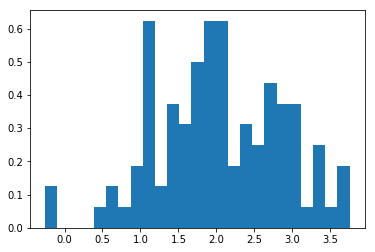

Mean of the mean: 2.0385191858950957
std of the mean: 0.8395625979616812


In [26]:
# your code here
# ...

N = 100
size = 5

mean = []
for i in range(N):
    samples = norm(loc = 2, scale = 2).rvs(size = size)
    mean.append(samples.mean())

plt.hist(mean, density = True, bins=25)
plt.show()

print('Mean of the mean:', np.mean(mean))
print('std of the mean:', np.std(mean))